In [1]:
pip install scikit-learn

In [2]:
# generacion de datos aleatorios
SEED = 123

import numpy as np
import pandas as pd

def generar_data(n_samples):
  np.random.seed(SEED)

  # genera datos de presion
  presion = np.random.randint(70, 180, n_samples)

  # genera datos de colesterol
  colesterol = np.random.randint(120, 250, n_samples)

  return presion, colesterol

presion, colesterol = generar_data(800)
df = pd.DataFrame({'Presion': presion, 'Colesterol': colesterol})
df.head()

,Presion,Colesterol
0,179,123
1,136,249
2,162,229
3,168,183
4,172,148


In [5]:
# calculacion de riesgo de problemas vasculares
def calcular_riesgo(presion, colesterol):
  return sum([
    (presion < 100) + (121 <= presion <= 140) + 2 * (presion > 140),
    (180 <= colesterol <= 200) + 2 * (colesterol > 200)
  ])

# comprobamos si la suma total de factores resulta en riesgo de prblemas vasculares
df['Riesgo'] = df.apply(lambda row: calcular_riesgo(row['Presion'], row['Colesterol']), axis=1)
df['Riesgo'] = (df['Riesgo'] >= 3).astype(int)
df.head()

,Presion,Colesterol,Riesgo
0,179,123,0
1,136,249,1
2,162,229,1
3,168,183,1
4,172,148,0


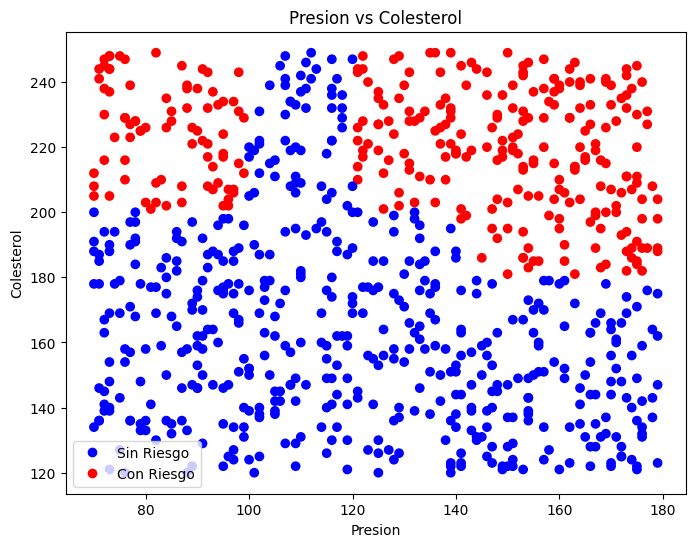

In [6]:
# visualizacion de puntos
import matplotlib.pyplot as plt

colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(8, 6))
plt.scatter(df['Presion'], df['Colesterol'], c=df['Riesgo'].map(colors))
plt.xlabel('Presion')
plt.ylabel('Colesterol')
plt.title(f'Presion vs Colesterol')
plt.legend(handles=[
  plt.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Sin Riesgo'),
  plt.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=8, label='Con Riesgo')
])
plt.show()

In [7]:
# separamos datos en entrenamiento y evaluacion
from sklearn.model_selection import train_test_split

X = df[['Presion', 'Colesterol']]
y = df['Riesgo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [9]:
# entrenamos la red neuronal
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1000, random_state=SEED)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=123,
              solver='lbfgs')

In [20]:
# evaluamos el modelo
y_pred = mlp.predict(X_test)

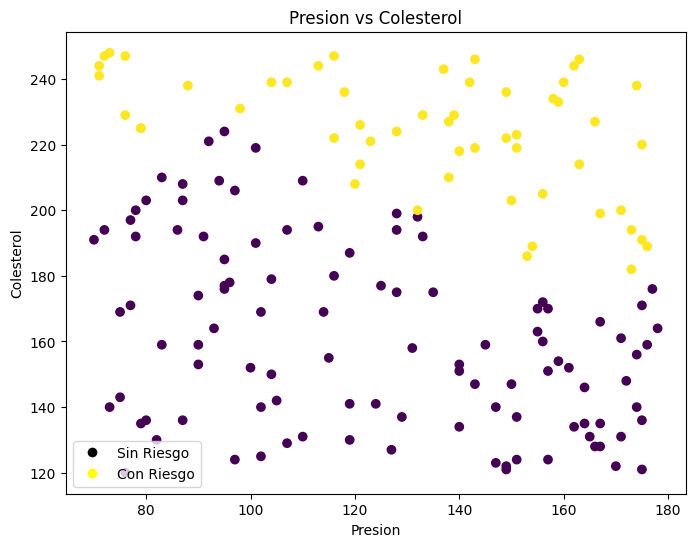

In [34]:
# visaulizamos las predicciones
import matplotlib.pyplot as plt

def plot_predicciones(X_test, y_pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(X_test['Presion'], X_test['Colesterol'], c=y_pred)
  plt.xlabel('Presion')
  plt.ylabel('Colesterol')
  plt.title(f'Presion vs Colesterol')
  plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=8, label='Sin Riesgo'),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=8, label='Con Riesgo')
  ])
  plt.show()

plot_predicciones(X_test, y_pred)

In [55]:
# metricas de evaluacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

def mostrar_metricas(y_test, y_pred):
  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'Precision: {precision_score(y_test, y_pred)}')
  print(f'Recall: {recall_score(y_test, y_pred)}')
  # print(f'F1 Score: {f1_score(y_test, y_pred)}')

  # # matriz de confusin
  # cm = confusion_matrix(y_test, y_pred)
  # print('Confusion Matrix:')
  # print(cm)

  # print('Classification Report:')
  # print(classification_report(y_test, y_pred))

mostrar_metricas(y_test, y_pred)

Accuracy: 0.9
Precision: 0.8518518518518519
Recall: 0.8518518518518519


In [56]:
# experimentos con red

# configuracion 1

# 1 - misma separacion de dataset entrenamiento/evaluacion como el original
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 2 - cambio de parametros de RRNN
mlp_2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20, 20), max_iter=10000, random_state=SEED)
mlp_2.fit(X_train_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=10000, random_state=123,
              solver='lbfgs')

In [57]:
# evaluamos con nueva RRNN
y_pred_2 = mlp_2.predict(X_test_2)

# metricas del modelo nuevo
mostrar_metricas(y_test_2, y_pred_2)

Accuracy: 0.91875
Precision: 0.847457627118644
Recall: 0.9259259259259259


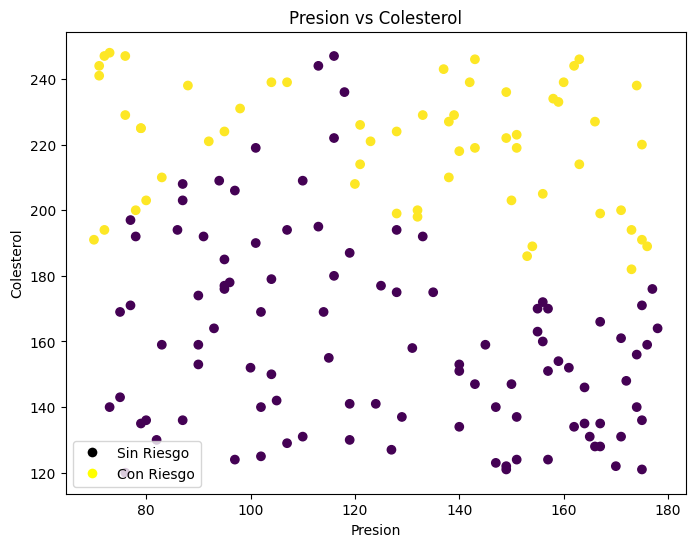

In [58]:
# dibuja el grafico para configuracion 1
plot_predicciones(X_test_2, y_pred_2)

In [59]:
# configuracion 2

# 1 - separacion distina de dataset entrenamiento/evaluacion
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.1, random_state=SEED)

# 2 - mismos parametros de RRNN que en el original
mlp_3 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1000, random_state=SEED)
mlp_3.fit(X_train_3, y_train_3)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=123,
              solver='lbfgs')

In [60]:
# evaluamos con nueva RRNN
y_pred_3 = mlp_3.predict(X_test_3)

# metricas del modelo nuevo
mostrar_metricas(y_test_3, y_pred_3)

Accuracy: 0.9
Precision: 0.875
Recall: 0.8076923076923077


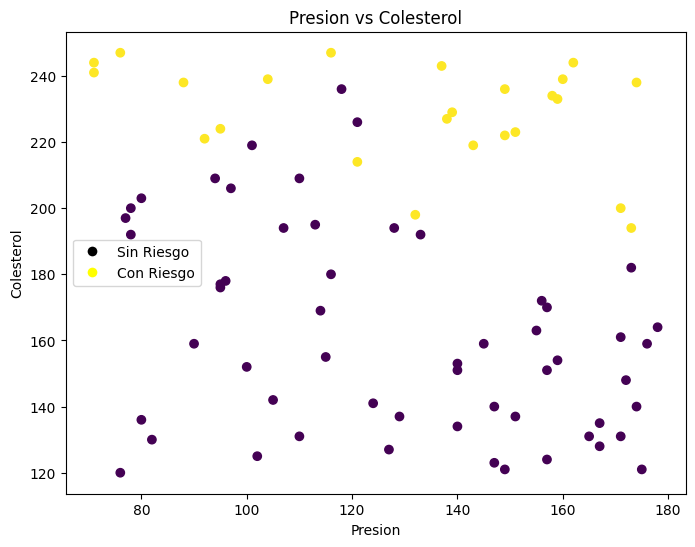

In [61]:
# dibuja el grafico para configuracion 2
plot_predicciones(X_test_3, y_pred_3)

In [62]:
# configuracion 3

# 1 - separacion distina de dataset entrenamiento/evaluacion
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.1, random_state=SEED)

# 2 - cambio de parametros de RRNN
mlp_4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20, 20), max_iter=10000, random_state=SEED)
mlp_4.fit(X_train_4, y_train_4)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=10000, random_state=123,
              solver='lbfgs')

In [63]:
# evaluamos con nueva RRNN
y_pred_4 = mlp_4.predict(X_test_4)

# metricas del modelo nuevo
mostrar_metricas(y_test_4, y_pred_4)

Accuracy: 0.925
Precision: 0.8846153846153846
Recall: 0.8846153846153846


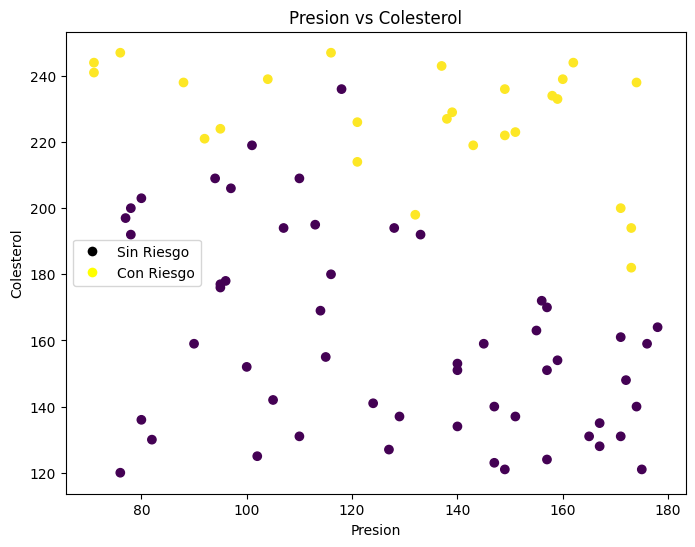

In [64]:
# dibuja el grafico para configuracion 3
plot_predicciones(X_test_4, y_pred_4)

Tenemos 3 configuraciones:
1. Incrementamos cantidad de neurones y num iteraciones, tamano de conjunto evaluacion es lo mismo que original;
2. Los parametros de RRNN los mismos que en original, tamano de conjunto evaluacion es menor;
3. Incrementamos cantidad de neurones y num iteraciones, y tambien cambiamos el tamano de conjunto evaluacion;

Podemos ver, que:
1. en caso de cambiar solo los parametros de RRNN, pueden mejorar un poco accuracy y recall, pero la precision puede bajar.
2. en caso de cambiar solo tamano de conjunto evaluacion, accuracy no cambia mucho, precision puede crecer y recall puede bajar.
3. al incrementar tanto la candidad de neurones en los hidden layers e iteraciones como cambiando el tamano de evaluacion, nos salen las mejores metricas de accuracy y precision, pero recall no es el mas alto.

De esto, podemos concluir que para la mejor precision (que puede ser el factor mas interesante para nosotros), podemos eligir la configuracion 3 (cambiar tanto parametros de RRNN como las distribuciones del dataset).